# **IBM HR Analytics**

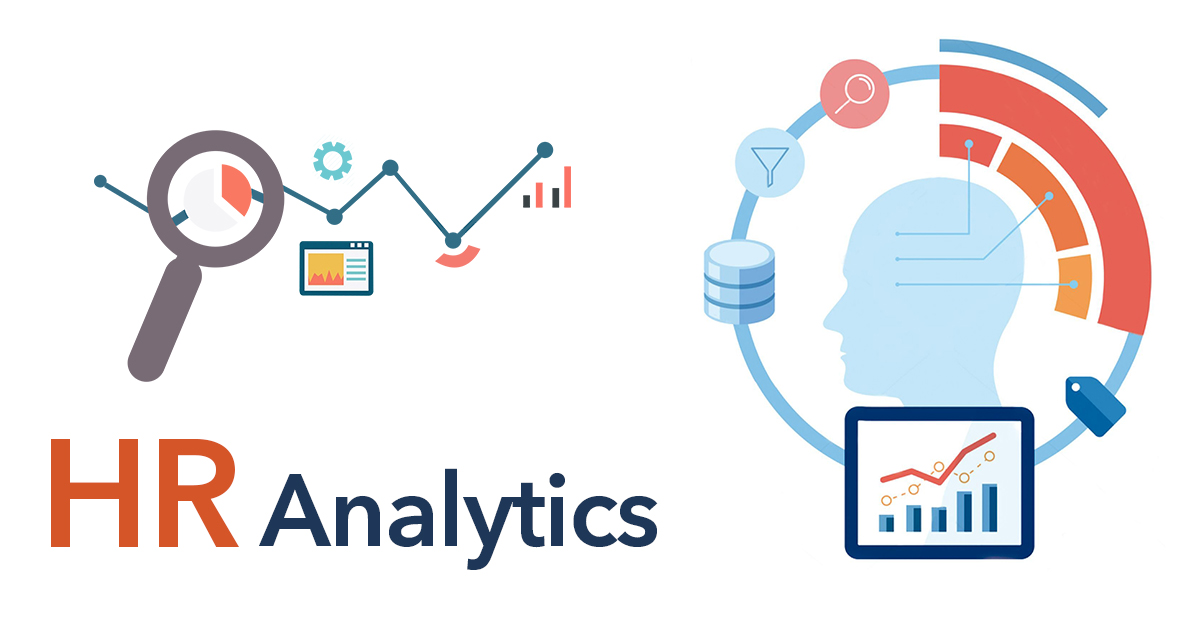

# **Import libraries**

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from scipy.stats import zscore
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# **Load Data**

In [272]:
hr = pd.read_csv('IBM-HR-Employee-Attrition&Performance.csv')

# **Data Pre_pocessing and EDA**

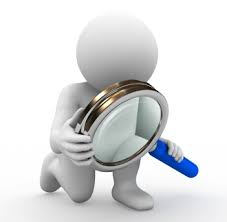

In [275]:
hr.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [276]:
hr.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [277]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<Axes: >

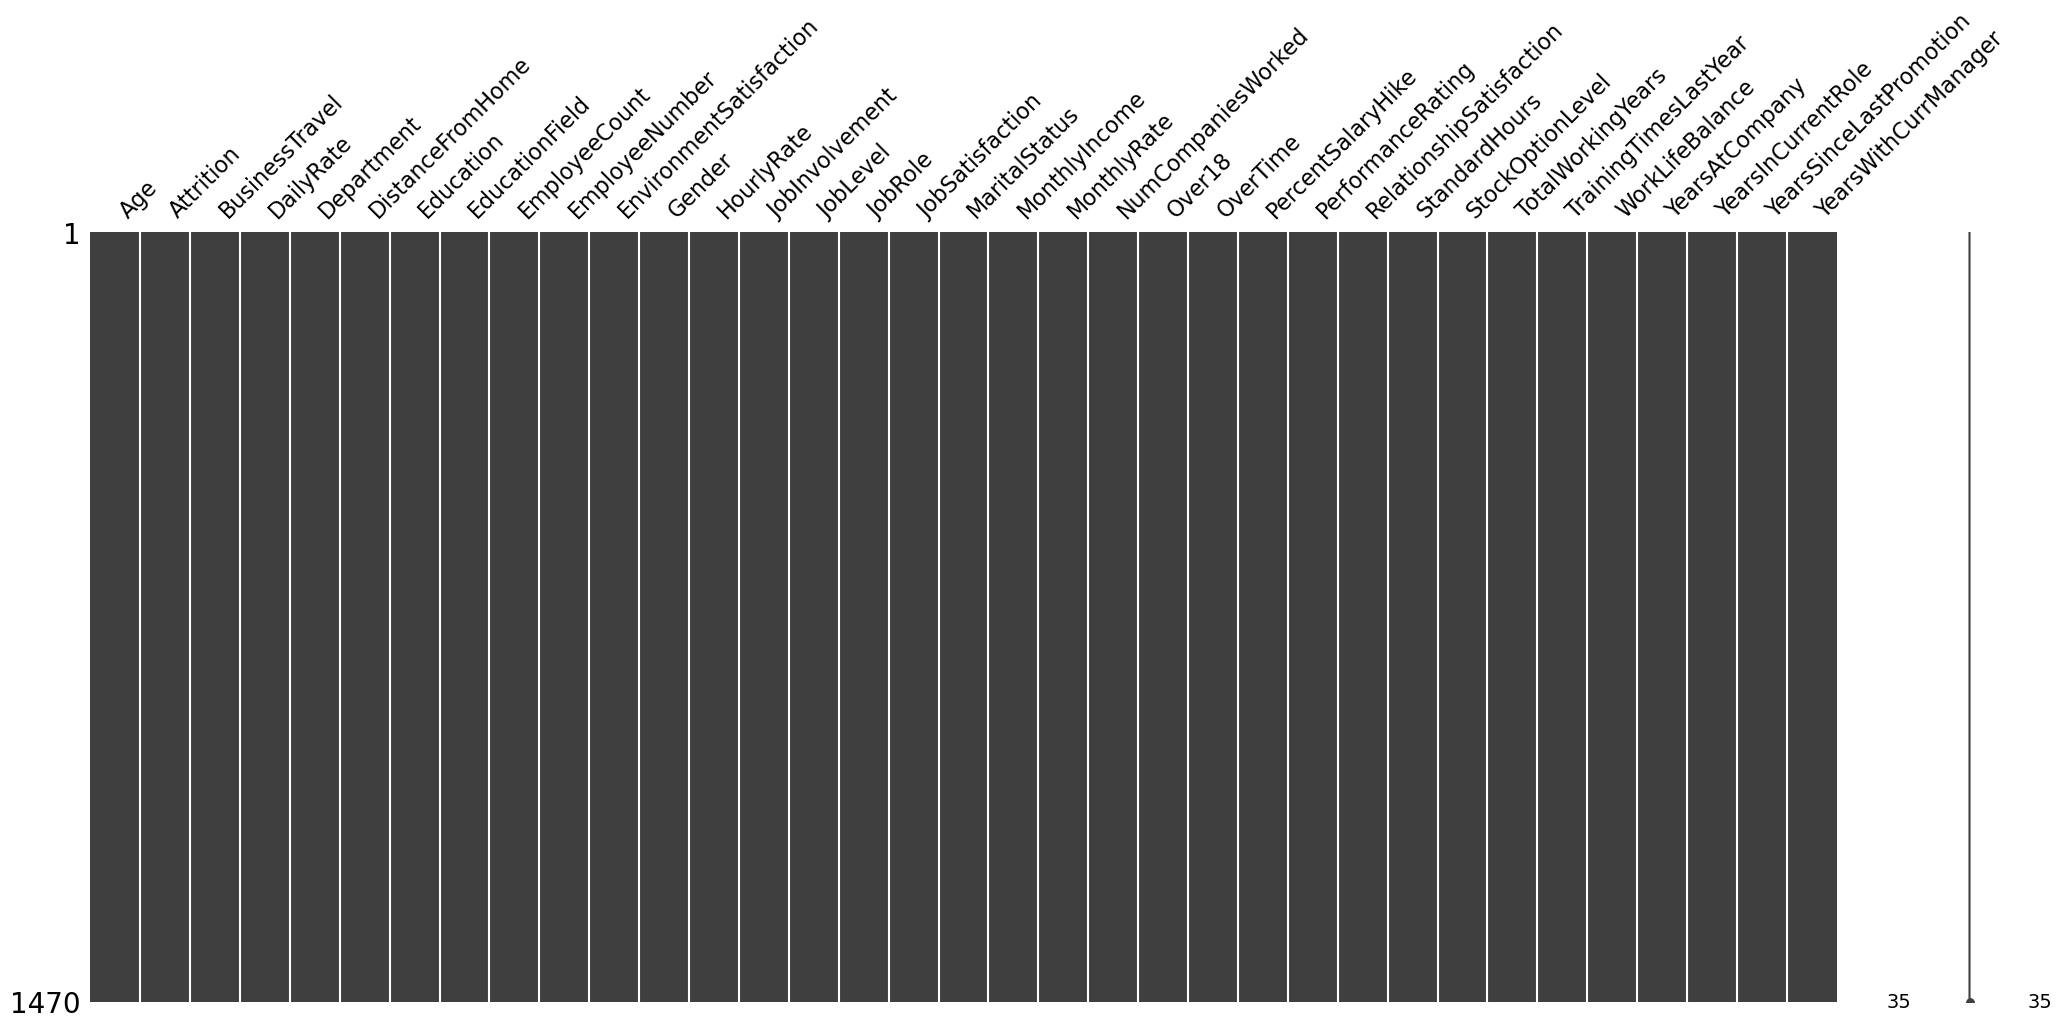

In [278]:
msno.matrix(hr)

* The data doesn't contain nulls"Missing values".

* some columns i will change thier values using categorial value like Education.

**Summery statistics**

In [281]:
hr.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [282]:
hr.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


* we found that all employees are over 18 years so this columns doesn't help us in analysis

In [284]:
for col in hr.select_dtypes(['number']):  # Iterate over numerical columns
    if hr[col].std() == 0:                # Check if standard deviation is 0
        print(col)

EmployeeCount
StandardHours


* will drop - "**Employeecount**", "**StandardHours**" and "**Over18**" because these columns where all values are identical (no variability), which are often useless for analysis

In [286]:
hr.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1, inplace=True)

In [287]:
hr.select_dtypes(['number']).columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

* we found some columns that thier values will replaced using categorical data
like **Education, EnvironmentSatisfaction, Jobinvolvment, PerformanceRating, worklifebalance and JobSatisfaction**

In [289]:
hr.select_dtypes(['object']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

**using mapping for replace to categorical**

In [291]:
# # Using map for categorical variables
Educaiton_mapping = {1 : 'Below college', 2: 'College', 3 : 'Bachelor', 4: 'Master', 5 : 'Doctor' }
hr['Education'] = hr['Education'].map(Educaiton_mapping)

In [292]:
EnvironmentSatisfaction_mapping = {1 : 'Low', 2: 'Medium', 3 : 'High', 4: 'Very High'}
hr['EnvironmentSatisfaction'] = hr['EnvironmentSatisfaction'].map(EnvironmentSatisfaction_mapping)

In [293]:
JobInvolvement_mapping = {1 : 'Low', 2: 'Medium', 3 : 'High', 4: 'Very High'}
hr['JobInvolvement'] = hr['JobInvolvement'].map(JobInvolvement_mapping)

In [294]:
PerformanceRating_mapping = {1:'Low', 2:'Good', 3:'Excellent', 4:'Outstanding'}
hr['PerformanceRating'] = hr['PerformanceRating'].map(PerformanceRating_mapping)

In [295]:
WorkLifeBalance_mapping = {1:'Bad', 2:'Good', 3:'Better', 4:'Best'}
hr['WorkLifeBalance'] = hr['WorkLifeBalance'].map(WorkLifeBalance_mapping)

In [296]:
RelationShipSatisfaction_mapping = {1:'Low', 2:'Medium', 3:'High', 4:'Very High'}
hr['RelationshipSatisfaction'] = hr['RelationshipSatisfaction'].map(RelationShipSatisfaction_mapping)

In [297]:
hr.select_dtypes(['object']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobRole', 'MaritalStatus', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'WorkLifeBalance'],
      dtype='object')

In [298]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   object
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   object
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [299]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,Medium,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below college,Life Sciences,2,High,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Very High,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,5,Very High,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below college,Medical,7,Low,...,Excellent,Very High,1,6,3,Better,2,2,2,2


# **Check and Handeling Outliers**

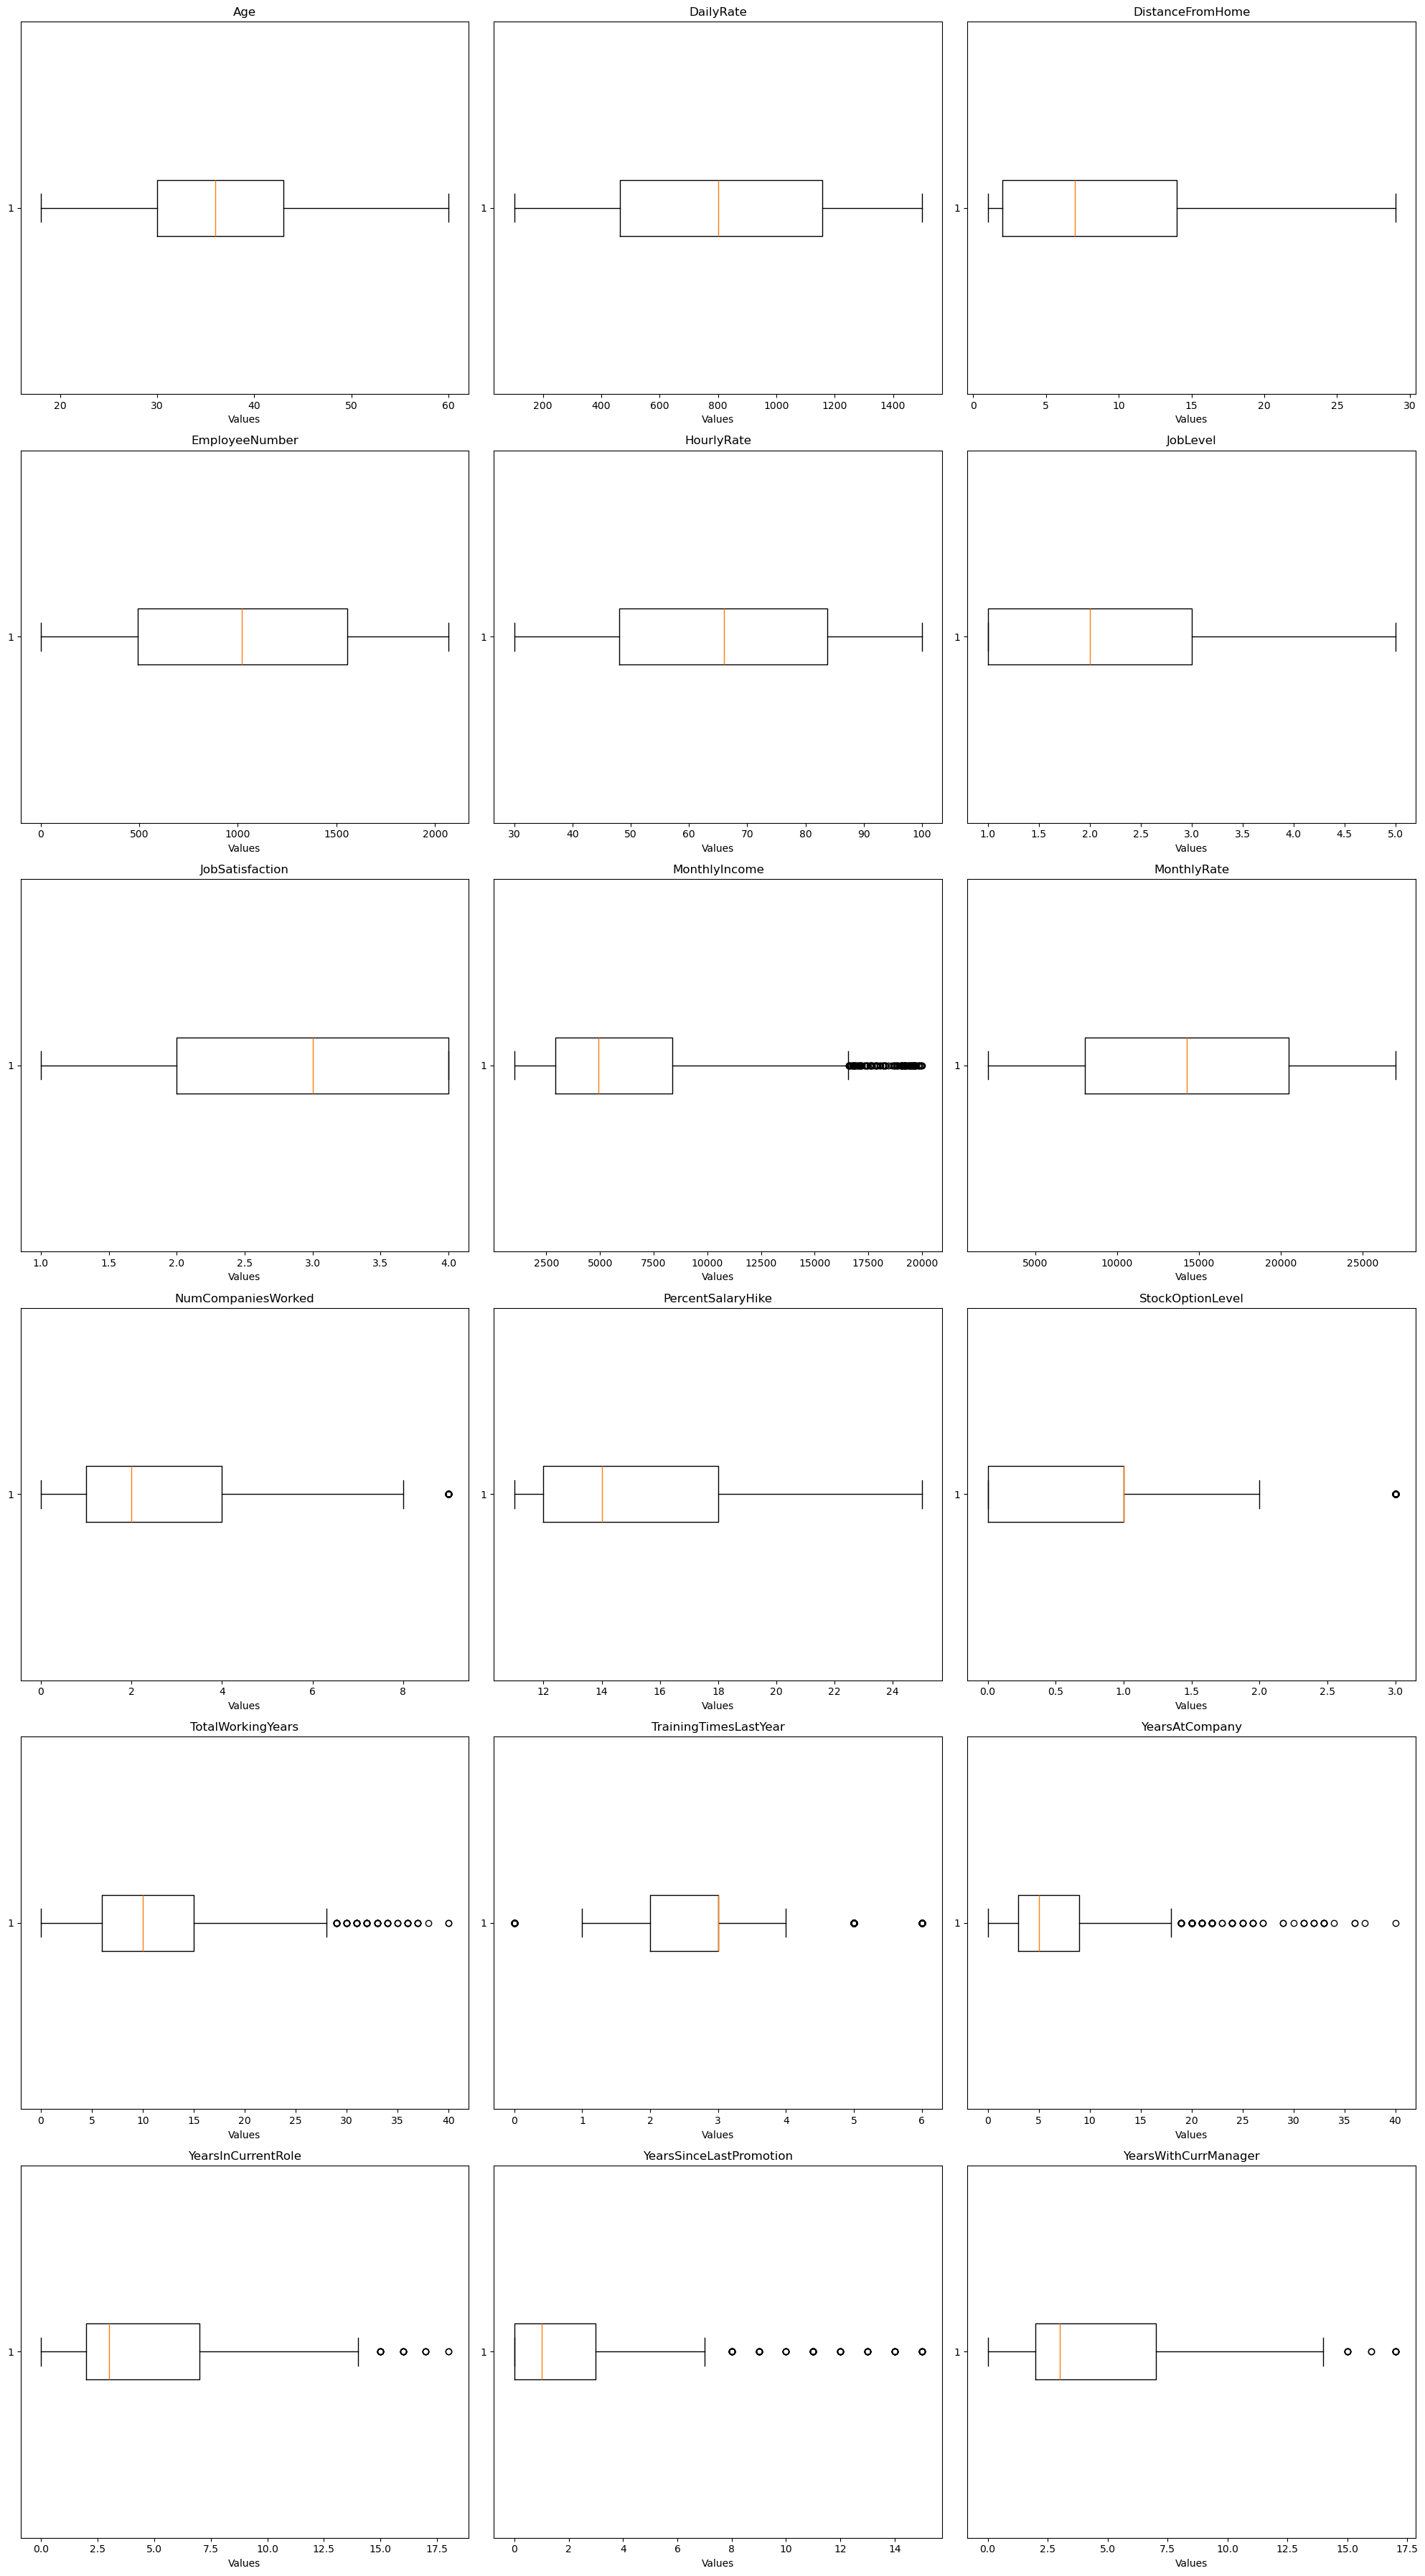

In [301]:
numerical_columns = hr.select_dtypes(include=['number']).columns
n_cols = 3  # Number of boxplots per row
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Rounded up division

# Create figure with dynamic height
plt.figure(figsize=(20, 6 * n_rows))

# Plot boxplots in grid format
for idx, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, idx)
    plt.boxplot(hr[col], vert=False)  # Horizontal boxplots for better readability
    plt.title(col)
    plt.xlabel('Values')

plt.tight_layout()
plt.show()

In [302]:
# print outliers

for col in numerical_columns:
  q1 = hr[col].quantile(.25)
  q3 = hr[col].quantile(.75)
  iqr = q3 - q1
  lower_band = q1 - 1.5 * iqr
  upper_band = q3 + 1.5 * iqr
  outliers = hr[(hr[col] < lower_band) | (hr[col]> upper_band)]
  if  outliers.shape[0] !=0:
    print(f'outliers in column {col}')
    display(outliers)
    print('\n')

outliers in column MonthlyIncome


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
25,53,No,Travel_Rarely,1282,Research & Development,5,Bachelor,Other,32,High,...,Excellent,Very High,1,26,3,Good,14,13,4,8
29,46,No,Travel_Rarely,705,Sales,2,Master,Marketing,38,Medium,...,Excellent,Very High,0,22,2,Good,2,2,2,1
45,41,Yes,Travel_Rarely,1360,Research & Development,12,Bachelor,Technical Degree,58,Medium,...,Excellent,Very High,0,23,0,Better,22,15,15,8
62,50,No,Travel_Rarely,989,Research & Development,7,College,Medical,80,Medium,...,Excellent,Very High,1,29,2,Good,27,3,13,8
105,59,No,Non-Travel,1420,Human Resources,2,Master,Human Resources,140,High,...,Outstanding,Very High,1,30,3,Better,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,58,No,Travel_Rarely,605,Sales,21,Bachelor,Life Sciences,1938,Very High,...,Excellent,High,1,29,2,Good,1,0,0,0
1377,49,No,Travel_Frequently,1064,Research & Development,2,Below college,Life Sciences,1941,Medium,...,Excellent,Very High,0,28,3,Better,5,4,4,3
1401,55,No,Travel_Rarely,189,Human Resources,26,Master,Human Resources,1973,High,...,Excellent,Low,1,35,0,Better,10,9,1,4
1437,39,No,Non-Travel,105,Research & Development,9,Bachelor,Life Sciences,2022,Very High,...,Excellent,High,0,21,3,Good,6,0,1,3




outliers in column NumCompaniesWorked


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
4,27,No,Travel_Rarely,591,Research & Development,2,Below college,Medical,7,Low,...,Excellent,Very High,1,6,3,Better,2,2,2,2
38,36,No,Travel_Rarely,852,Research & Development,5,Master,Life Sciences,51,Medium,...,Excellent,Very High,1,6,3,Best,1,1,0,0
50,48,Yes,Travel_Rarely,626,Research & Development,1,College,Life Sciences,64,Low,...,Excellent,Very High,0,23,2,Better,1,0,0,0
95,54,No,Travel_Rarely,1217,Research & Development,2,Master,Technical Degree,126,Low,...,Excellent,Low,1,16,5,Bad,4,3,0,3
105,59,No,Non-Travel,1420,Human Resources,2,Master,Human Resources,140,High,...,Outstanding,Very High,1,30,3,Better,3,2,2,2
122,56,Yes,Travel_Rarely,441,Research & Development,14,Master,Life Sciences,161,Medium,...,Excellent,Low,3,7,2,Better,5,4,4,3
194,45,No,Non-Travel,1195,Research & Development,2,College,Medical,264,Low,...,Outstanding,Very High,1,22,1,Better,20,8,11,8
198,38,No,Travel_Rarely,1261,Research & Development,2,Master,Life Sciences,271,Very High,...,Excellent,Medium,0,14,3,Better,1,0,0,0
208,40,No,Non-Travel,1151,Research & Development,9,Doctor,Life Sciences,287,Very High,...,Excellent,Very High,1,5,5,Bad,3,2,0,2
245,31,No,Travel_Frequently,1327,Research & Development,3,Master,Medical,337,Medium,...,Excellent,Low,1,9,3,Better,2,2,2,2




outliers in column StockOptionLevel


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
6,59,No,Travel_Rarely,1324,Research & Development,3,Bachelor,Medical,10,High,...,Outstanding,Low,3,12,3,Good,1,0,0,0
64,36,No,Travel_Rarely,1223,Research & Development,8,Bachelor,Technical Degree,83,High,...,Excellent,Medium,3,17,2,Better,17,14,12,8
65,55,No,Travel_Rarely,836,Research & Development,8,Bachelor,Medical,84,Very High,...,Excellent,High,3,21,2,Better,5,0,0,2
83,38,No,Non-Travel,573,Research & Development,6,Bachelor,Medical,107,Medium,...,Excellent,Very High,3,17,3,Better,13,11,1,9
88,30,No,Travel_Rarely,288,Research & Development,2,Bachelor,Life Sciences,117,High,...,Excellent,Low,3,11,3,Better,11,10,10,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,31,No,Travel_Rarely,1276,Research & Development,2,Below college,Medical,1974,Very High,...,Excellent,High,3,1,4,Better,1,0,0,0
1415,33,No,Non-Travel,1313,Research & Development,1,College,Medical,1994,Medium,...,Excellent,High,3,1,2,Good,1,1,0,0
1440,36,No,Travel_Frequently,688,Research & Development,4,College,Life Sciences,2025,Very High,...,Excellent,Medium,3,18,3,Better,4,2,0,2
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,Master,Medical,2027,Low,...,Excellent,Medium,3,4,3,Best,2,2,2,2




outliers in column TotalWorkingYears


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
18,53,No,Travel_Rarely,1219,Sales,2,Master,Life Sciences,23,Low,...,Excellent,High,0,31,3,Better,25,8,3,7
62,50,No,Travel_Rarely,989,Research & Development,7,College,Medical,80,Medium,...,Excellent,Very High,1,29,2,Good,27,3,13,8
85,56,No,Travel_Rarely,1400,Research & Development,7,Bachelor,Life Sciences,112,Very High,...,Excellent,Low,0,37,3,Good,6,4,0,2
98,58,No,Travel_Rarely,682,Sales,10,Master,Medical,131,Very High,...,Excellent,High,0,38,1,Good,37,10,1,8
105,59,No,Non-Travel,1420,Human Resources,2,Master,Human Resources,140,High,...,Outstanding,Very High,1,30,3,Better,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,55,No,Travel_Rarely,478,Research & Development,2,Bachelor,Medical,1770,High,...,Excellent,Medium,3,34,2,Better,1,0,0,0
1301,58,No,Non-Travel,350,Sales,2,Bachelor,Medical,1824,Medium,...,Outstanding,Very High,1,37,0,Good,16,9,14,14
1331,48,No,Travel_Rarely,1224,Research & Development,10,Bachelor,Life Sciences,1867,Very High,...,Excellent,Very High,0,29,3,Better,22,10,12,9
1374,58,No,Travel_Rarely,605,Sales,21,Bachelor,Life Sciences,1938,Very High,...,Excellent,High,1,29,2,Good,1,0,0,0




outliers in column TrainingTimesLastYear


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,Medium,...,Excellent,Low,0,8,0,Bad,6,4,0,5
10,35,No,Travel_Rarely,809,Research & Development,16,Bachelor,Medical,14,Low,...,Excellent,High,1,6,5,Better,5,4,0,3
16,32,No,Travel_Rarely,334,Research & Development,5,College,Life Sciences,21,Low,...,Excellent,Very High,2,7,5,Good,6,2,0,5
20,24,No,Non-Travel,673,Research & Development,11,College,Other,26,Low,...,Excellent,Very High,1,5,5,Good,4,2,1,3
23,21,No,Travel_Rarely,391,Research & Development,15,College,Life Sciences,30,High,...,Excellent,Very High,0,0,6,Better,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,21,No,Travel_Rarely,501,Sales,5,Below college,Medical,2021,High,...,Excellent,Very High,0,2,6,Better,2,2,1,2
1448,41,No,Travel_Rarely,930,Sales,3,Bachelor,Life Sciences,2037,High,...,Excellent,High,1,14,5,Better,5,4,0,4
1458,35,No,Travel_Rarely,287,Research & Development,1,Master,Life Sciences,2052,High,...,Excellent,Very High,1,4,5,Better,4,3,1,1
1466,39,No,Travel_Rarely,613,Research & Development,6,Below college,Medical,2062,Very High,...,Excellent,Low,1,9,5,Better,7,7,1,7




outliers in column YearsAtCompany


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
18,53,No,Travel_Rarely,1219,Sales,2,Master,Life Sciences,23,Low,...,Excellent,High,0,31,3,Better,25,8,3,7
28,44,No,Travel_Rarely,477,Research & Development,7,Master,Medical,36,Low,...,Excellent,Very High,1,24,4,Better,22,6,5,17
45,41,Yes,Travel_Rarely,1360,Research & Development,12,Bachelor,Technical Degree,58,Medium,...,Excellent,Very High,0,23,0,Better,22,15,15,8
62,50,No,Travel_Rarely,989,Research & Development,7,College,Medical,80,Medium,...,Excellent,Very High,1,29,2,Good,27,3,13,8
63,59,No,Travel_Rarely,1435,Sales,25,Bachelor,Life Sciences,81,Low,...,Excellent,Very High,0,28,3,Good,21,16,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,39,No,Travel_Rarely,119,Sales,15,Master,Marketing,1975,Medium,...,Excellent,Low,0,21,3,Better,20,8,11,10
1404,42,No,Non-Travel,335,Research & Development,23,College,Life Sciences,1976,Very High,...,Excellent,Very High,0,20,2,Better,20,9,3,7
1443,42,No,Travel_Rarely,300,Research & Development,2,Bachelor,Life Sciences,2031,Low,...,Excellent,Low,0,24,2,Good,22,6,4,14
1445,41,No,Travel_Rarely,582,Research & Development,28,Master,Life Sciences,2034,Low,...,Outstanding,High,1,21,3,Better,20,7,0,10




outliers in column YearsInCurrentRole


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
45,41,Yes,Travel_Rarely,1360,Research & Development,12,Bachelor,Technical Degree,58,Medium,...,Excellent,Very High,0,23,0,Better,22,15,15,8
63,59,No,Travel_Rarely,1435,Sales,25,Bachelor,Life Sciences,81,Low,...,Excellent,Very High,0,28,3,Good,21,16,7,9
123,51,No,Travel_Rarely,684,Research & Development,6,Bachelor,Life Sciences,162,Low,...,Excellent,High,0,23,5,Better,20,18,15,15
187,55,No,Travel_Rarely,692,Research & Development,14,Master,Medical,254,High,...,Excellent,Very High,0,36,3,Better,24,15,2,15
190,52,No,Travel_Rarely,699,Research & Development,1,Master,Life Sciences,259,High,...,Excellent,Low,1,34,5,Better,33,18,11,9
231,42,No,Travel_Rarely,532,Research & Development,4,College,Technical Degree,319,High,...,Excellent,Very High,0,22,3,Better,22,17,11,15
281,42,No,Travel_Rarely,635,Sales,1,Below college,Life Sciences,387,Medium,...,Outstanding,High,0,20,3,Better,20,16,11,6
417,40,No,Travel_Rarely,1398,Sales,2,Master,Life Sciences,558,High,...,Excellent,Very High,0,21,2,Better,20,15,1,12
466,41,No,Travel_Rarely,1276,Sales,2,Doctor,Life Sciences,625,Medium,...,Excellent,Medium,1,22,2,Better,18,16,11,8
595,58,Yes,Travel_Rarely,286,Research & Development,2,Master,Life Sciences,825,Very High,...,Excellent,Very High,0,40,2,Better,31,15,13,8




outliers in column YearsSinceLastPromotion


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
15,29,No,Travel_Rarely,1389,Research & Development,21,Master,Life Sciences,20,Medium,...,Excellent,High,1,10,1,Better,10,9,8,8
45,41,Yes,Travel_Rarely,1360,Research & Development,12,Bachelor,Technical Degree,58,Medium,...,Excellent,Very High,0,23,0,Better,22,15,15,8
46,34,No,Non-Travel,1065,Sales,23,Master,Marketing,60,Medium,...,Outstanding,High,0,10,2,Better,9,5,8,7
55,33,No,Travel_Frequently,515,Research & Development,1,College,Life Sciences,73,Low,...,Excellent,High,0,15,1,Better,15,14,8,12
61,38,No,Travel_Frequently,653,Research & Development,29,Doctor,Life Sciences,79,Very High,...,Excellent,Very High,0,10,2,Better,10,3,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,47,No,Travel_Rarely,1180,Research & Development,25,Bachelor,Medical,1993,Low,...,Outstanding,Medium,0,25,3,Better,17,14,12,11
1425,33,No,Travel_Rarely,501,Research & Development,15,College,Medical,2009,Medium,...,Excellent,Low,1,10,6,Better,9,7,8,1
1444,56,Yes,Travel_Rarely,310,Research & Development,7,College,Technical Degree,2032,Very High,...,Excellent,Very High,1,14,4,Bad,10,9,9,8
1447,36,No,Non-Travel,301,Sales,15,Master,Marketing,2036,Very High,...,Outstanding,Low,1,15,4,Good,15,12,11,11




outliers in column YearsWithCurrManager


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
28,44,No,Travel_Rarely,477,Research & Development,7,Master,Medical,36,Low,...,Excellent,Very High,1,24,4,Better,22,6,5,17
123,51,No,Travel_Rarely,684,Research & Development,6,Bachelor,Life Sciences,162,Low,...,Excellent,High,0,23,5,Better,20,18,15,15
153,45,No,Travel_Rarely,194,Research & Development,9,Bachelor,Life Sciences,206,Medium,...,Excellent,High,1,20,2,Bad,17,9,0,15
187,55,No,Travel_Rarely,692,Research & Development,14,Master,Medical,254,High,...,Excellent,Very High,0,36,3,Better,24,15,2,15
231,42,No,Travel_Rarely,532,Research & Development,4,College,Technical Degree,319,High,...,Excellent,Very High,0,22,3,Better,22,17,11,15
386,37,No,Travel_Rarely,1107,Research & Development,14,Bachelor,Life Sciences,515,Very High,...,Excellent,High,1,18,2,Good,18,7,12,17
561,52,No,Travel_Rarely,621,Sales,3,Master,Marketing,776,High,...,Excellent,Low,0,34,3,Best,34,6,1,16
616,51,No,Travel_Rarely,1318,Sales,26,Master,Marketing,851,Low,...,Excellent,High,1,29,2,Good,20,6,4,17
635,35,No,Travel_Rarely,607,Research & Development,9,Bachelor,Life Sciences,880,Very High,...,Outstanding,Medium,1,17,2,Better,17,14,5,15
686,41,No,Travel_Rarely,263,Research & Development,6,Bachelor,Medical,957,Very High,...,Excellent,High,0,20,3,Better,18,13,2,17


Replaced 114 outliers in MonthlyIncome with median 4919.0
Replaced 52 outliers in NumCompaniesWorked with median 2.0
Replaced 85 outliers in StockOptionLevel with median 1.0
Replaced 63 outliers in TotalWorkingYears with median 10.0
Replaced 238 outliers in TrainingTimesLastYear with median 3.0
Replaced 104 outliers in YearsAtCompany with median 5.0
Replaced 21 outliers in YearsInCurrentRole with median 3.0
Replaced 107 outliers in YearsSinceLastPromotion with median 1.0
Replaced 14 outliers in YearsWithCurrManager with median 3.0


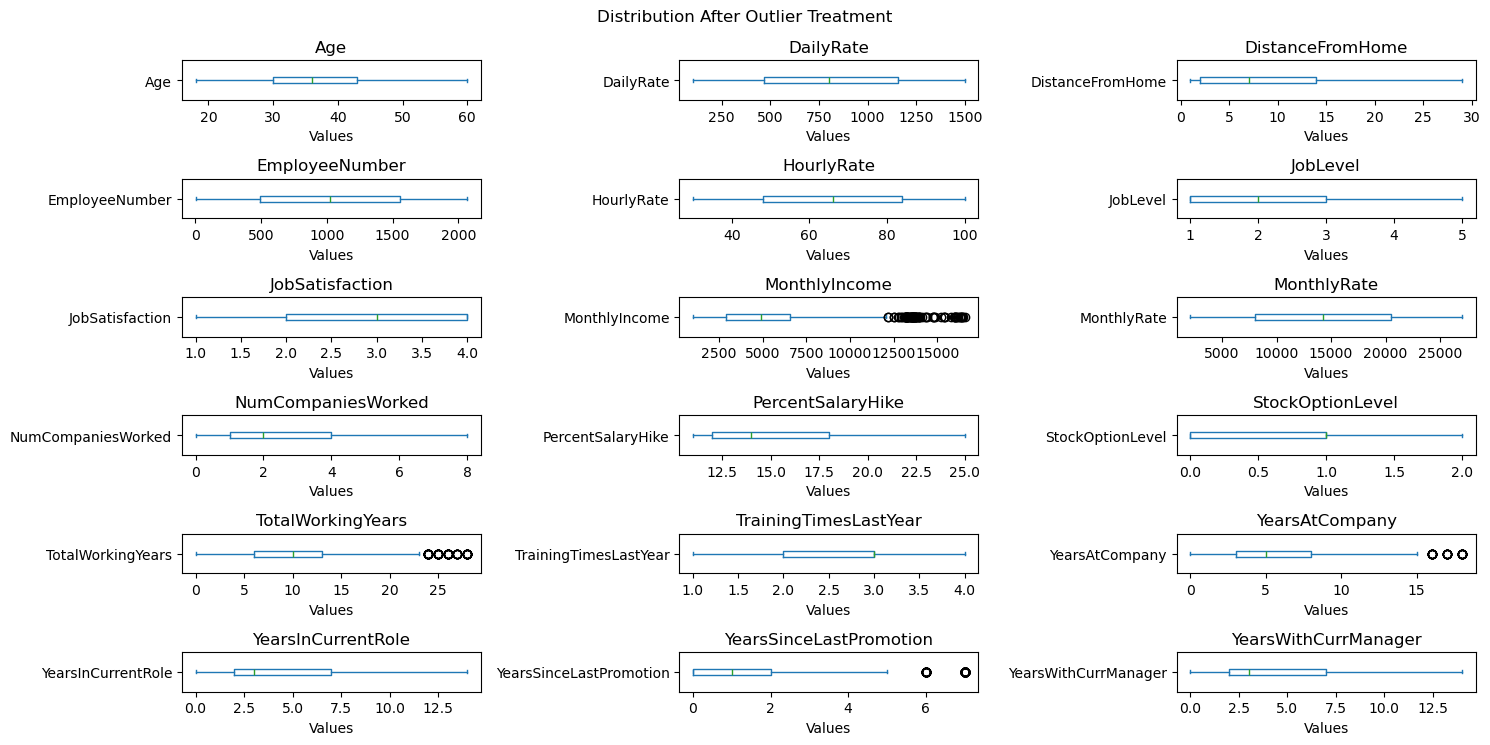

In [303]:
import pandas as pd
import matplotlib.pyplot as plt

# Get numerical columns
numerical_columns = hr.select_dtypes(include=['number']).columns

# 1. Detect and replace outliers in original dataset
for col in numerical_columns:
    # Calculate IQR
    q1 = hr[col].quantile(0.25)
    q3 = hr[col].quantile(0.75)
    iqr = q3 - q1

    # Skip columns with no variability
    if iqr == 0:
        print(f"Skipped {col} (no variability)")
        continue

    # Calculate bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # For HR tenure metrics, ensure lower bound isn't negative
    if 'Years' in col:
        lower_bound = max(lower_bound, 0)

    # Find and replace outliers
    outlier_mask = (hr[col] < lower_bound) | (hr[col] > upper_bound)
    if outlier_mask.any():
        median = hr[col].median()
        hr.loc[outlier_mask, col] = median
        print(f"Replaced {outlier_mask.sum()} outliers in {col} with median {median}")

# 2. Create boxplots to verify results
plt.figure(figsize=(15, 8))
for idx, col in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns)//3)+1, 3, idx)  # 3 columns per row
    hr[col].plot(kind='box', vert=False)
    plt.title(col)
    plt.xlabel('Values')

plt.tight_layout()
plt.suptitle('Distribution After Outlier Treatment', y=1.02)
plt.show()

# **Analysis**

* Definition HR analytics is the process of collecting and analyzing Human Resource (HR) data in order to improve an organization’s workforce performance. The process can also be referred to as talent analytics, people analytics, or even workforce analytics. This method of data analysis takes data that is routinely collected by HR and correlates it to HR and organizational objectives

**KPIs**

In [308]:
total_employees = len(hr)
total_employees

1470

In [309]:
hr['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [310]:
hr['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [311]:
hr['Education'].value_counts()

Education
Bachelor         572
Master           398
College          282
Below college    170
Doctor            48
Name: count, dtype: int64

In [312]:
hr['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [313]:
hr['JobLevel'].value_counts()

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

In [314]:
hr['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [315]:
hr['MonthlyIncome'].mean().round(2)

5457.49

In [316]:
hr['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [317]:
hr.MaritalStatus.value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [318]:
# distribution by age
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']

hr['AgeGroup'] = pd.cut(hr['Age'], bins = bins, labels = labels)
hr.AgeGroup.value_counts()


AgeGroup
30-39    619
18-29    378
40-49    322
50-59    143
60+        0
Name: count, dtype: int64

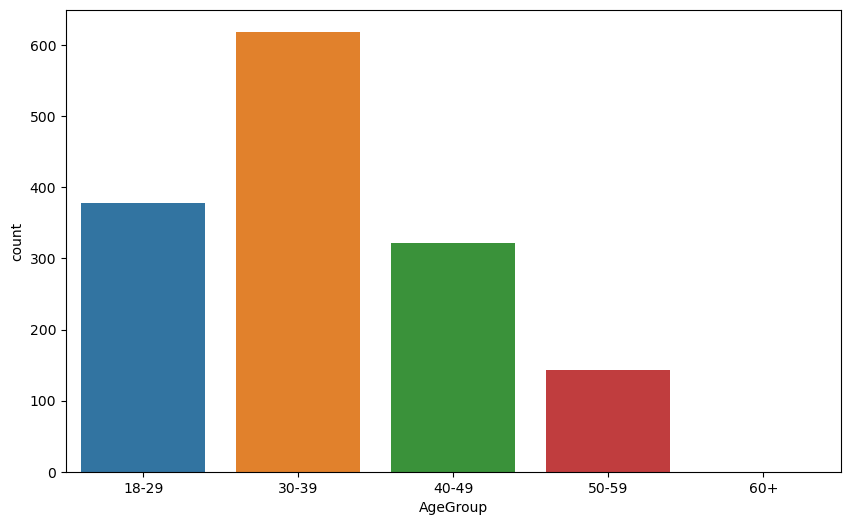

In [319]:
plt.figure(figsize=(10, 6))
sns.countplot(data= hr, x='AgeGroup')
plt.show()


# **Analysis & Questions**


*   ATTRITION >>	Employee leaving the company (0=no, 1=yes)



In [321]:
hr.Attrition.value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

**Does Gender affect attrition ??**


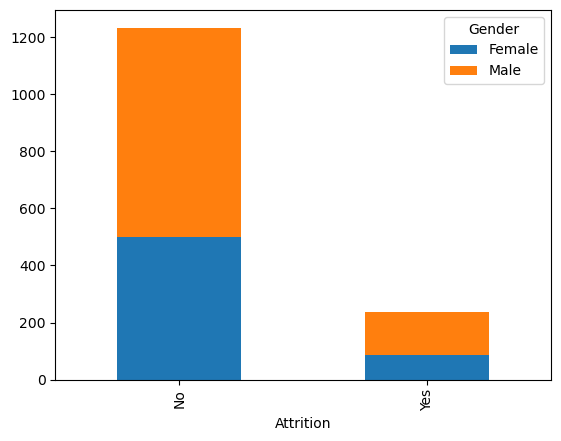

In [323]:
hr.groupby('Attrition')['Gender'].value_counts().unstack().plot.bar(stacked=True)
plt.show()

* most people leaving the company are males respect to females

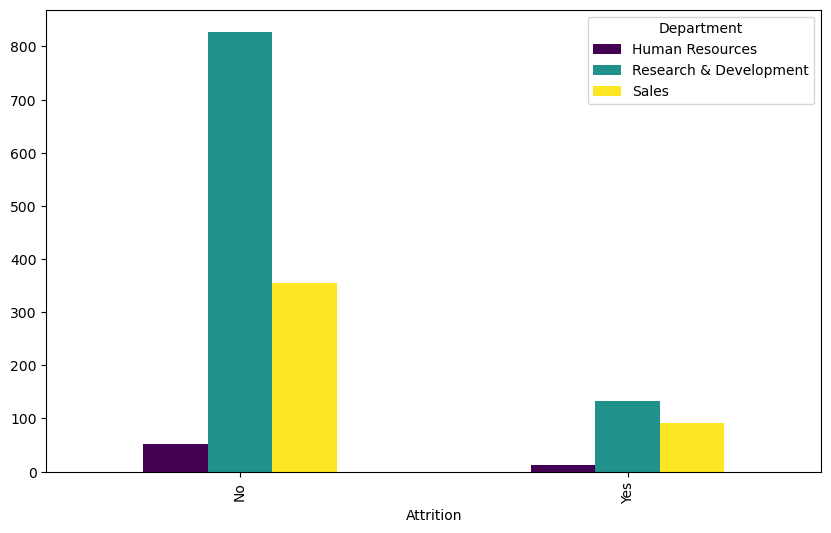

In [325]:
hr.groupby('Attrition')['Department'].value_counts().unstack().plot.bar(stacked=False, figsize=(10, 6), colormap='viridis')
plt.show()

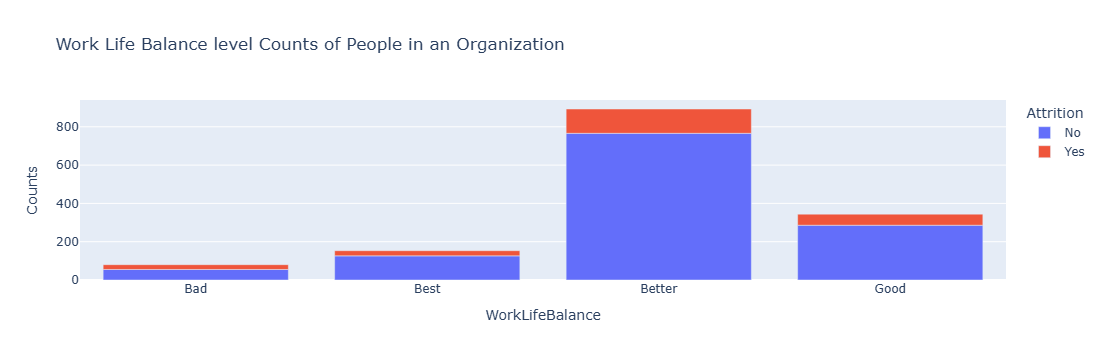

In [326]:
wlb_att=hr.groupby(['WorkLifeBalance','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.bar(wlb_att,x='WorkLifeBalance',y='Counts',color='Attrition',title='Work Life Balance level Counts of People in an Organization')

* most employee leaving company who wrok in R&D department respect to other departments

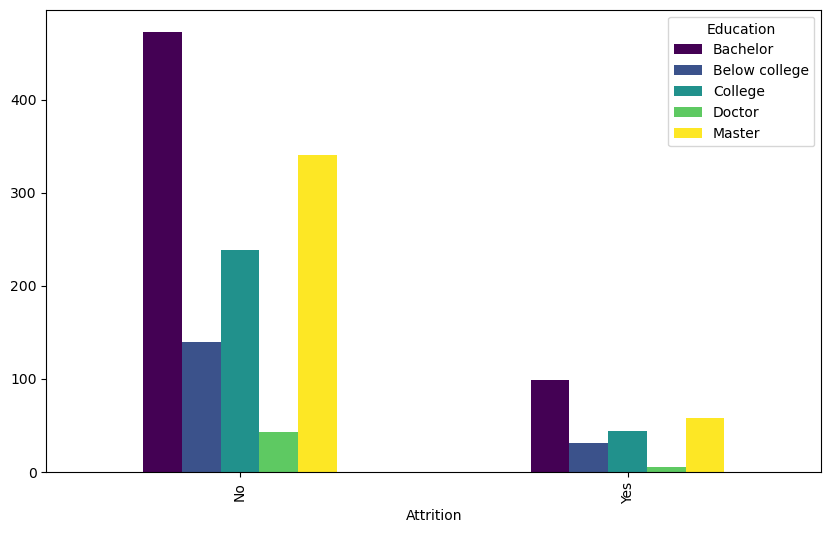

In [328]:
hr.groupby('Attrition')['Education'].value_counts().unstack().plot.bar(stacked=False, figsize=(10, 6), colormap='viridis')
plt.show()

* most employees leaving the company who have Bachelor degree

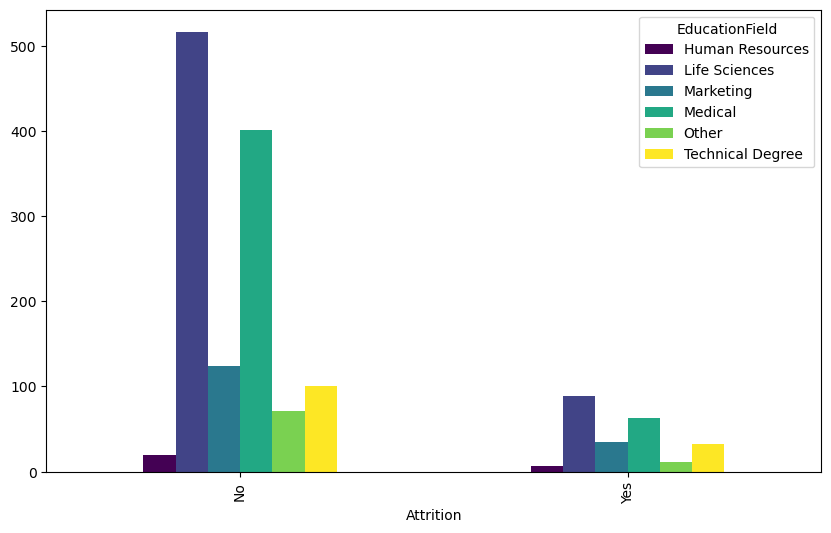

In [330]:
hr.groupby('Attrition')['EducationField'].value_counts().unstack().plot.bar(stacked=False, figsize=(10, 6), colormap='viridis')
plt.show()

* employees whose Educational field is Life Science are the most leaving the company

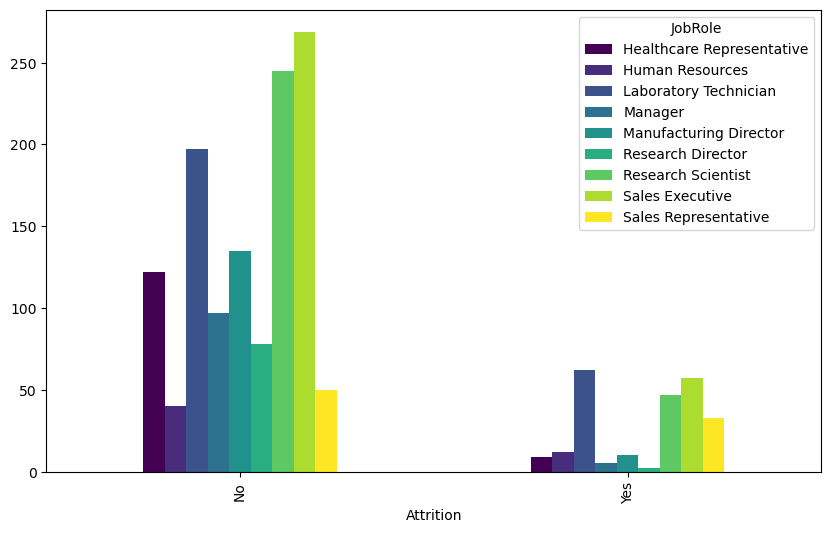

In [332]:
hr.groupby('Attrition')['JobRole'].value_counts().unstack().plot.bar(stacked=False, figsize=(10, 6), colormap='viridis')
plt.show()

* employees whose job role is Laboratory Technician most leaving the company then Sales Excutive

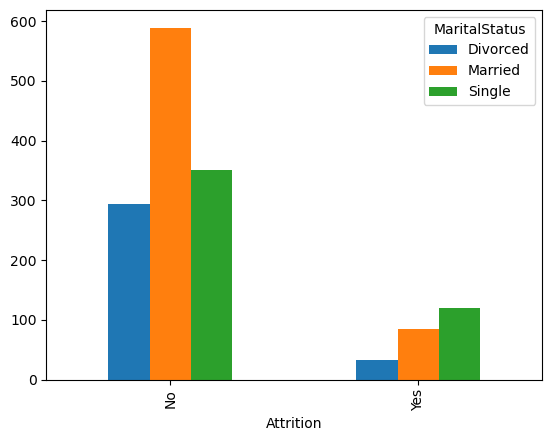

In [334]:
hr.groupby('Attrition')['MaritalStatus'].value_counts().unstack().plot.bar(stacked=False)
plt.show()

* employee with marital status Single most leaving the company

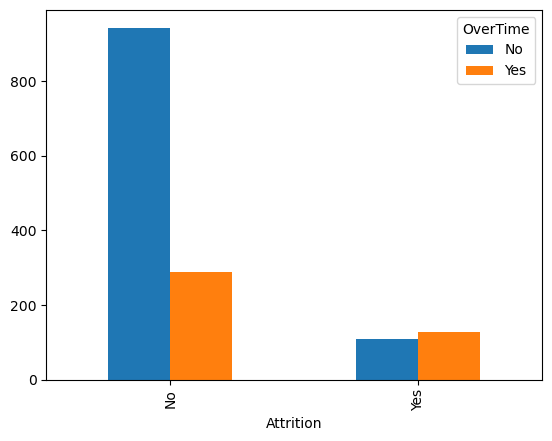

In [336]:
hr.groupby('Attrition')['OverTime'].value_counts().unstack().plot.bar(stacked=False)
plt.show()

* over time working one of reasons that make employee leaving

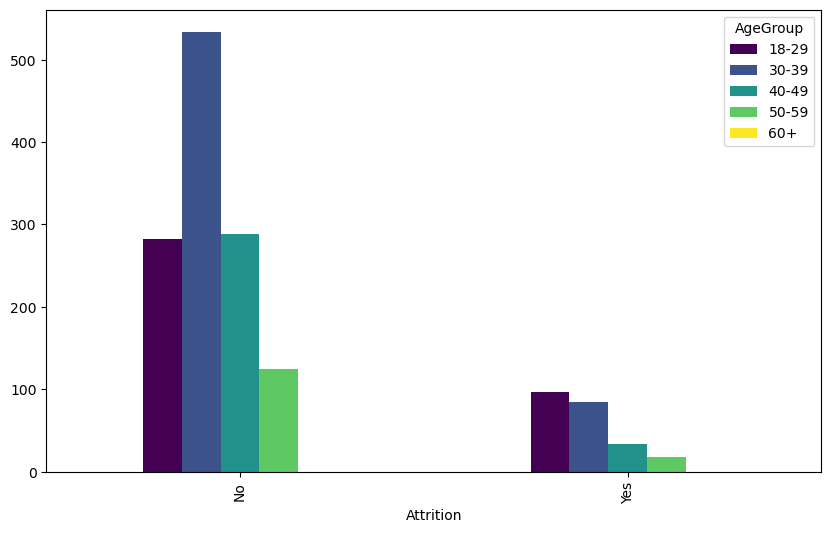

In [338]:
hr.groupby('Attrition')['AgeGroup'].value_counts().unstack().plot.bar(stacked=False, figsize=(10, 6), colormap='viridis')
plt.show()

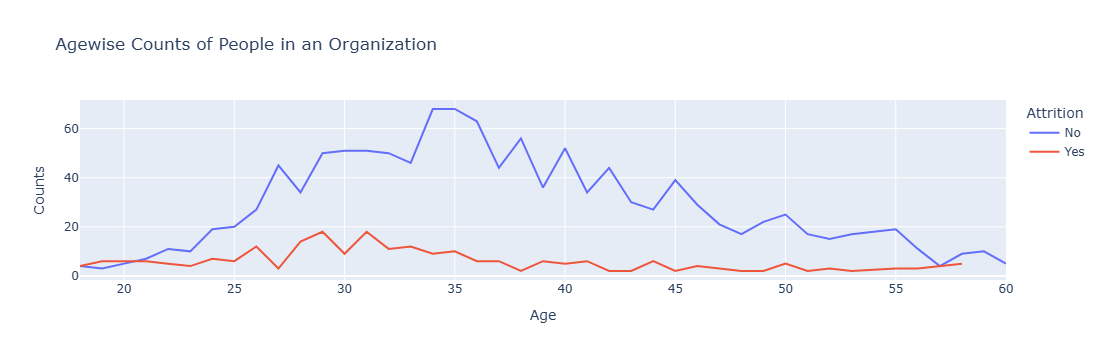

In [339]:
age_att=hr.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(age_att,x='Age',y='Counts',color='Attrition',title='Agewise Counts of People in an Organization')



*   Employees whose age between 18-29 most attrition from the company
*   attrition % increase to 31 and then reduce when age of employees increase.



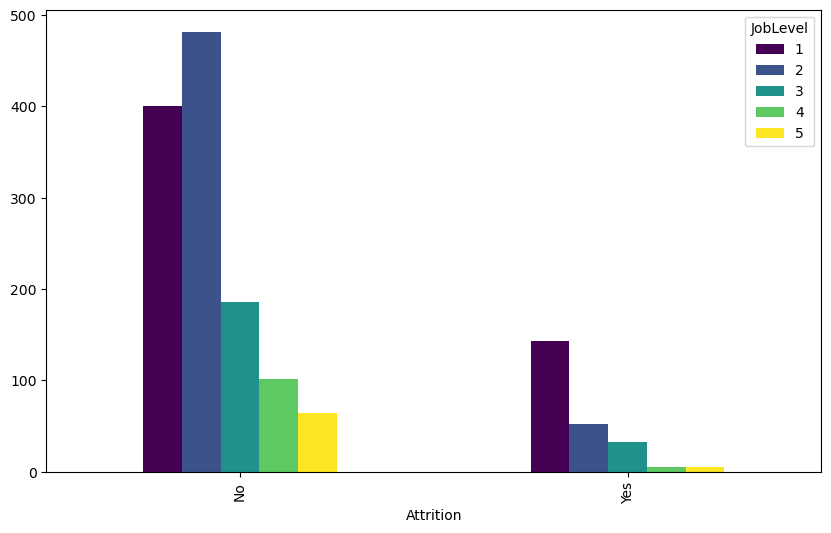

In [341]:
hr.groupby('Attrition')['JobLevel'].value_counts().unstack().plot.bar(stacked=False, figsize=(10, 6), colormap='viridis')
plt.show()

* Attrition % reduce with employees old is increasing

**Does Job Satasifaction impact on Attrition?**

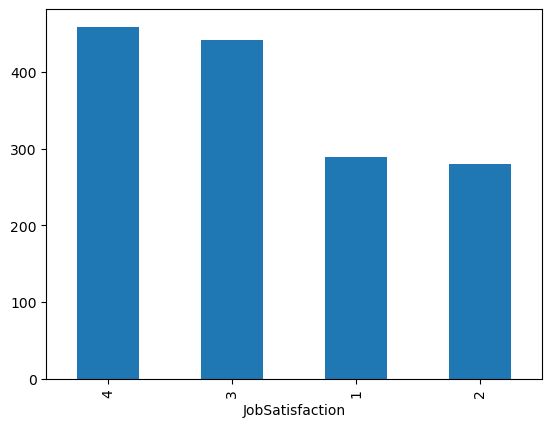

In [344]:
hr.JobSatisfaction.value_counts().sort_values(ascending=False).plot.bar(stacked = False)
plt.show()

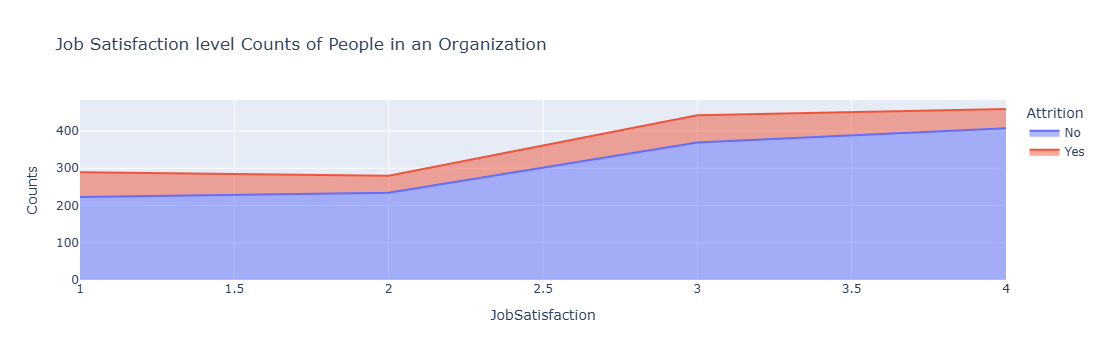

In [345]:
jsats_att=hr.groupby(['JobSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(jsats_att,x='JobSatisfaction',y='Counts',
        color='Attrition',title='Job Satisfaction level Counts of People in an Organization')

* this mean that attrition increase when the job_satisfaction level increase

Travel Impact on Attrition?

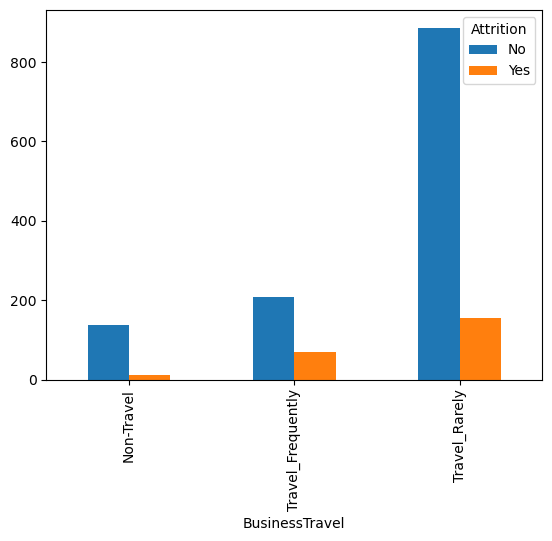

In [348]:
hr.Attrition.groupby(hr.BusinessTravel).value_counts().unstack().plot.bar(stacked=False)
plt.show()

* the Business travel has low impact on attrition

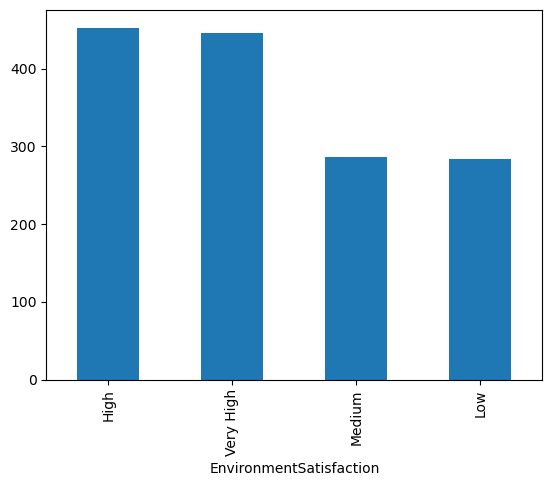

In [350]:
hr.EnvironmentSatisfaction.value_counts().sort_values(ascending=False).plot.bar(stacked = False)
plt.show()

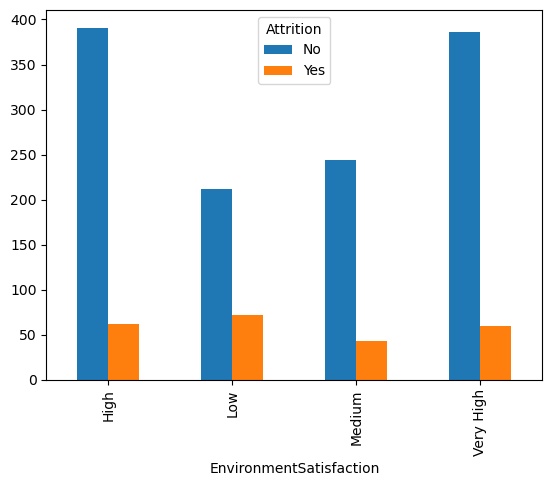

In [351]:
hr.Attrition.groupby(hr.EnvironmentSatisfaction).value_counts().sort_values(ascending=False).unstack().plot.bar(stacked=False)
plt.show()

* the environment has an impact on Attrition because the low environment satisaction is the highest % of attrition on the company.

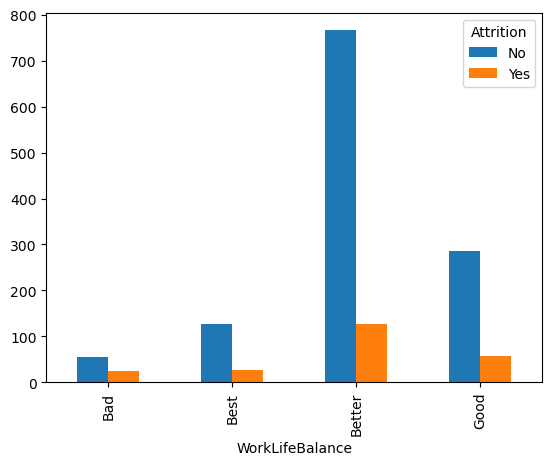

In [353]:
hr.Attrition.groupby(hr.WorkLifeBalance).value_counts().unstack().plot.bar(stacked=False)
plt.show()

* if the worklifebalance reduced the attrition will be increase

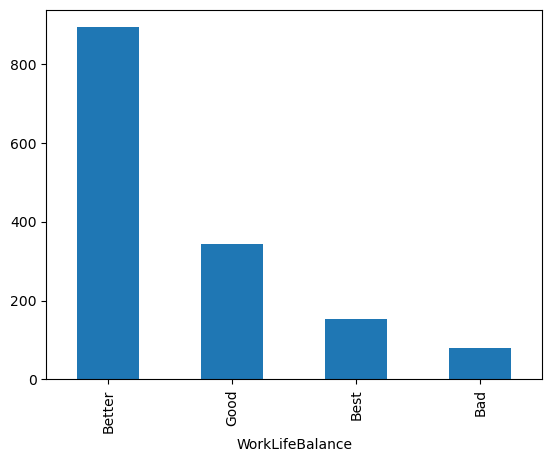

In [355]:
hr.WorkLifeBalance.value_counts().sort_values(ascending=False).plot.bar(stacked = False)
plt.show()

**Check Relationship Satisfaction**

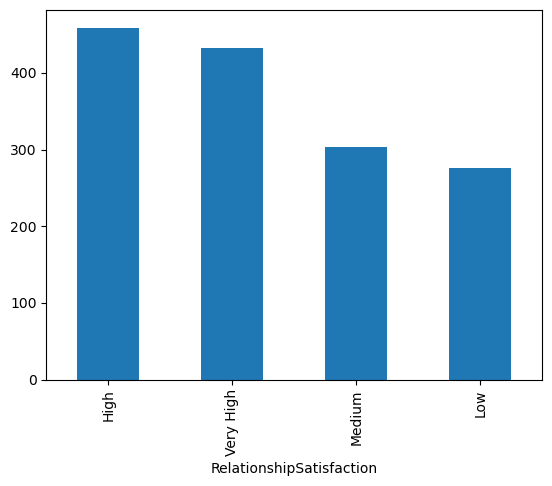

In [357]:
hr.RelationshipSatisfaction.value_counts().sort_values(ascending=False).plot.bar(stacked = False)
plt.show()

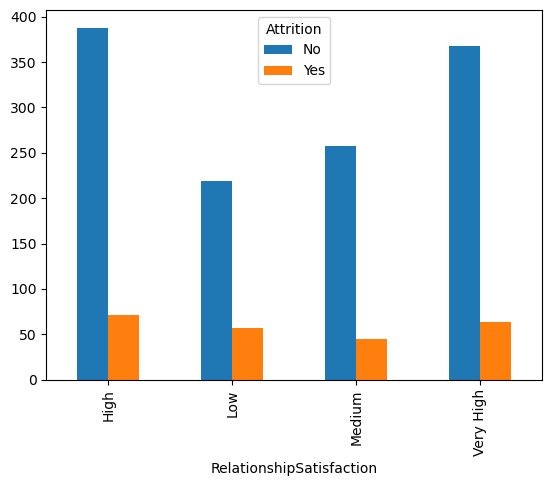

In [358]:
hr.Attrition.groupby(hr.RelationshipSatisfaction).value_counts().unstack().plot.bar(stacked=False)
plt.show()

* We found that the relationship on work has an impact on attrition.

**Check Job Sataisfaction respect to other factores**

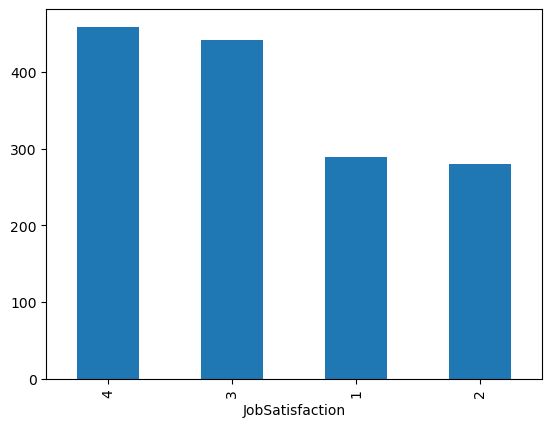

In [361]:
hr.JobSatisfaction.value_counts().sort_values(ascending=False).plot.bar(stacked = False)
plt.show()

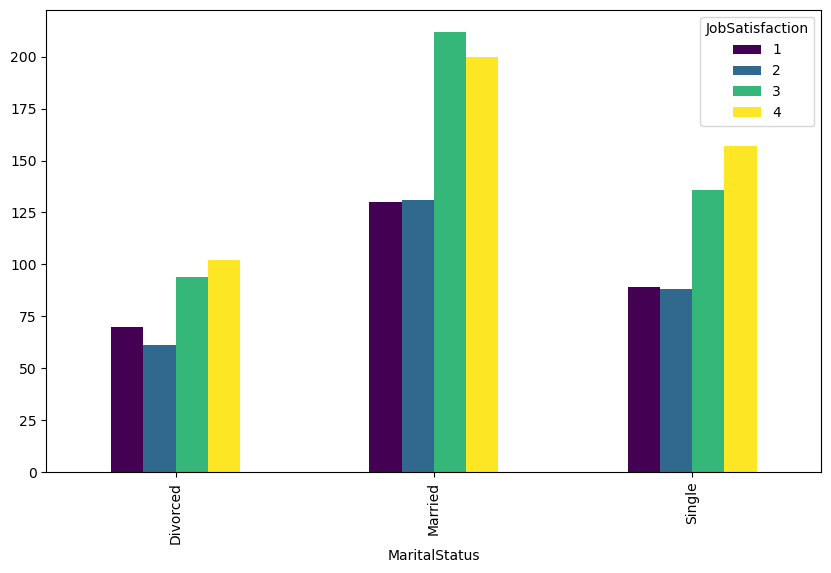

In [362]:
hr.JobSatisfaction.groupby(hr.MaritalStatus).value_counts().unstack().plot.bar(stacked=False, figsize=(10, 6), colormap='viridis')
plt.show()

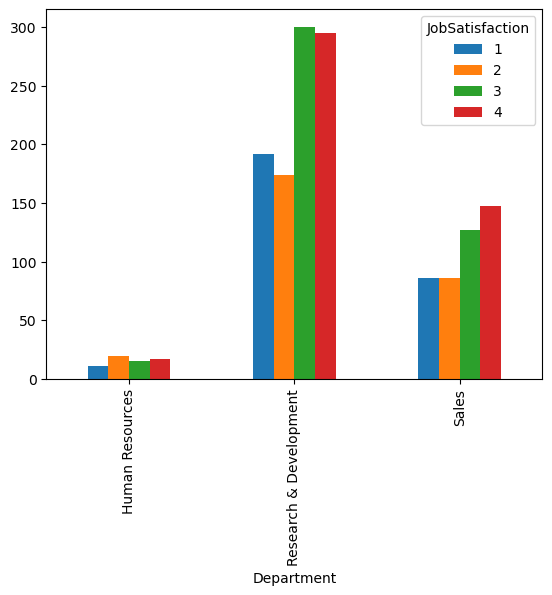

In [363]:
hr.JobSatisfaction.groupby(hr.Department).value_counts().unstack().plot.bar(stacked=False)
plt.show()

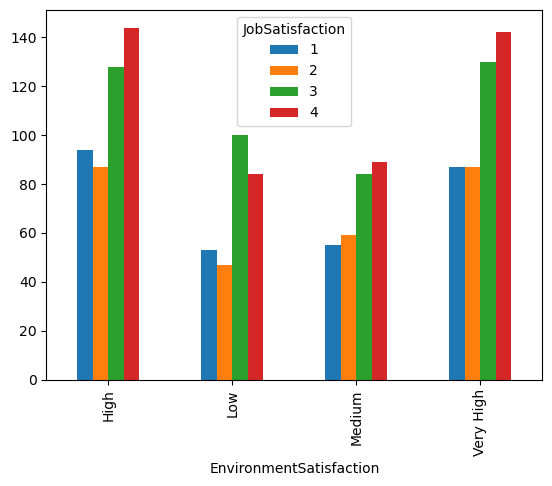

In [364]:
hr.JobSatisfaction.groupby(hr.EnvironmentSatisfaction).value_counts().unstack().plot.bar(stacked=False)
plt.show()

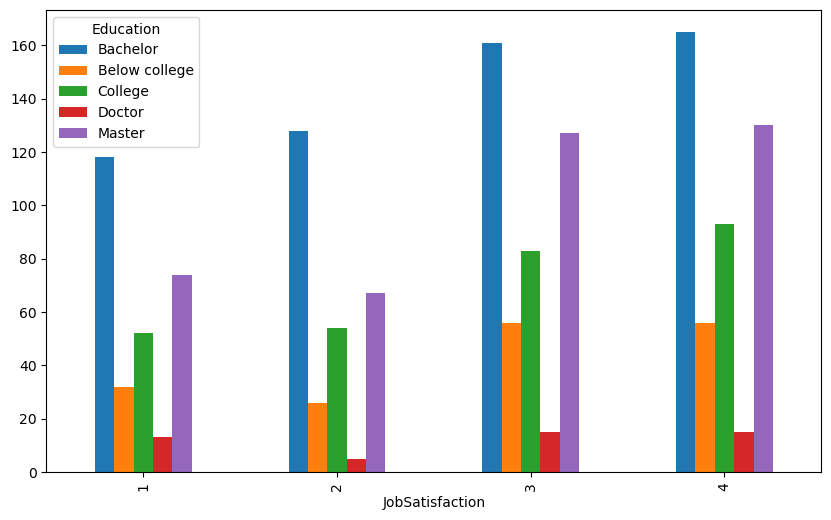

In [366]:
hr.Education.groupby(hr.JobSatisfaction).value_counts().unstack().plot.bar(stacked=False, figsize=(10, 6))
plt.show()

**IS the manager reson for employees attrition??**

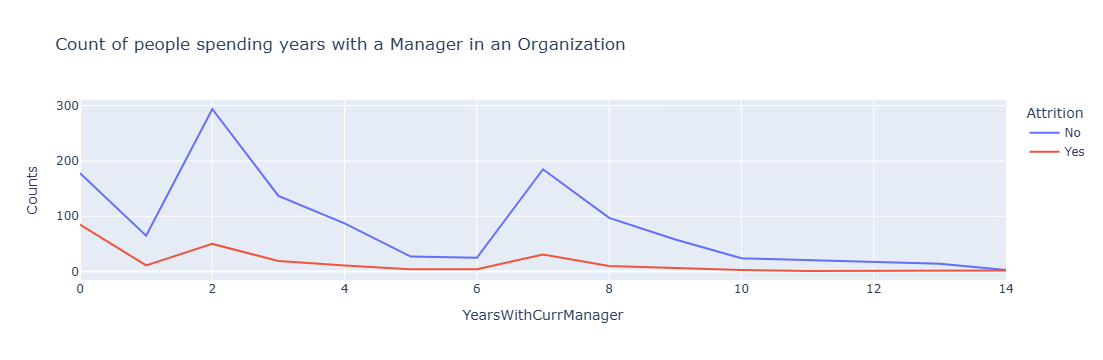

In [368]:
man_att=hr.groupby(['YearsWithCurrManager','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(man_att,x='YearsWithCurrManager',y='Counts',color='Attrition',title='Count of people spending years with a Manager in an Organization')

* At the very start, where the time spent with the manager is relatively less- people tend to leave their jobs- considering their relationship with their previous managers

**How does last experience affect on attrition??**

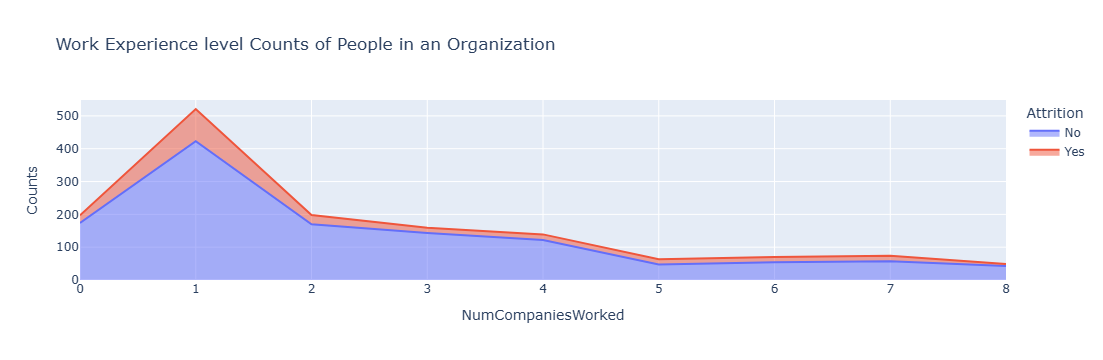

In [371]:
ncwrd_att=hr.groupby(['NumCompaniesWorked','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(ncwrd_att,x='NumCompaniesWorked',y='Counts',color='Attrition',title='Work Experience level Counts of People in an Organization')

* employees who started their career with the company- or have switched to the company in the initial years of their career, have a higher chances of leaving the organization to a different company.

# **Summary**

**We have checked the data, and have come upon to infer the following observations:**

* People are tending to switch to a different jobs at the start of their careers, or at the earlier parts of it. Once they have settled with a family or have found stability in their jobs, they tend to stay long in the same organization- only going for vertical movements in the same organization.

* Salary and stock ptions have a great motivation on the employees and people tend to leave the organization much lesser. Higher pay and more stock options have seen more employees remain loyal to their company.

* Work life balance is a great motivation factor for the employees. However, people with a good work-life balance, tend to switch in search of better opportunities and a better standard of living.

* Departments where target meeting performance is very much crucial (for e.g. Sales) tend to have a greater chances of leaving the organization as compared to departments with more administration perspective (For e.g. Human Resources)

* People with a good Job Satisfaction and Environment satisfaction are loyal to the organization- and this speaks loud for any Organization. However, people who are not much satisfied with their current project- tend to leave the organization far more.


# **Extract to excel file**

In [376]:
hr.to_excel("cleaned_data.xlsx", index=False)